We put each track in ER, FXHedge in USD

In [1]:
import pandas as pd
import numpy as np
from tools import make_track, make_ER, make_FXHedge

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
risk_premia = pd.read_csv("financial_data/bnp_risk_premia_data.csv", index_col=0, parse_dates=True, dayfirst=True).ffill()
risk_premia.head()

,BNPIDRXA,BNPIF3AX,BNPIF3XM,BPFXSTGU,BNPICCE3,BNPIVMRU,BPCURVW4,BNPIVCXA,BNPIAIRT,BPFXGGUR,...,BNPIPMEE,BNPIPQEE,BNPIPVEE,BNPILUEE,BNPIPMUH,BNPIPQUH,BNPIPVUH,BNPIMDEA,BNPIAIFH,BNPICVXA
2007-01-03,153.6663,181.5663,112.1145,90.1218,100.0000,95.4872,105.6487,NaN,99.9994,150.4603,...,148.1003,120.9601,137.4880,109.1312,109.6681,114.6682,112.6115,864.8248,NaN,NaN
2007-01-04,153.6990,183.3276,112.9935,90.2280,100.0000,95.5542,105.6708,NaN,99.9986,150.2949,...,147.7733,120.4843,136.8767,108.8743,109.8051,114.6962,112.2605,864.9515,NaN,NaN
2007-01-05,154.2276,180.1691,111.9295,90.3846,99.9697,95.3608,105.6251,NaN,100.0106,149.5454,...,149.1407,121.0231,137.4881,108.7382,109.5945,114.6205,112.4398,855.8688,NaN,NaN
2007-01-08,154.3188,177.3272,110.6079,90.3826,99.9952,95.4417,105.6079,NaN,100.0222,149.5987,...,150.1971,121.5947,137.8128,108.8844,109.6909,114.4555,112.2247,854.7843,NaN,NaN
2007-01-09,154.0072,175.6288,109.6858,90.3365,99.9761,95.4620,105.5857,NaN,100.0333,150.4460,...,150.2008,121.5710,137.8311,109.0599,109.8676,114.1862,112.0361,855.2095,NaN,NaN


In [3]:
GBP_USD_fx = pd.read_csv(r"financial_data/FX_rates.csv", index_col=0, parse_dates=True, dayfirst=True)['GBP/USD']
JPY_USD_fx = pd.read_csv(r"financial_data/FX_rates.csv", index_col=0, parse_dates=True, dayfirst=True)['JPY/USD']
EUR_USD_fx = pd.read_csv(r"financial_data/FX_rates.csv", index_col=0, parse_dates=True, dayfirst=True)['EUR/USD']

In [4]:
AIR_TR_GBP = risk_premia[["BNPIAIRG"]].dropna()
AIR_TR_JPY = risk_premia[["BNPIAIRJ"]].dropna()
AIR_TR_EUR = risk_premia[["BNPIAIRE"]].dropna()
CVXA = risk_premia[["BNPICVXA"]].dropna()
VCXA = risk_premia[["BNPIVCXA"]].dropna()
AIFH = risk_premia[["BNPIAIFH"]].dropna()
AIRU = risk_premia[["BNPIAIRU"]].dropna()

GBP_rate = pd.read_csv(r"financial_data/GBP_rates.csv", index_col=0, parse_dates=True, dayfirst=True)['3M']
EUR_rate = pd.read_csv(r"financial_data/EUR_rates.csv", index_col=0, parse_dates=True, dayfirst=True)['3M']
JPY_rate = pd.read_csv(r"financial_data/JPY_rates.csv", index_col=0, parse_dates=True, dayfirst=True)['3M']

AIR_ER_GBP = make_ER(AIR_TR_GBP, GBP_rate)
AIR_ER_JPY = make_ER(AIR_TR_JPY, JPY_rate)
AIR_ER_EUR = make_ER(AIR_TR_EUR, EUR_rate)

AIR_ER_GBP_FX = make_FXHedge(AIR_TR_GBP, GBP_USD_fx)
AIR_ER_JPY_FX = make_FXHedge(AIR_TR_JPY, JPY_USD_fx)
AIR_ER_EUR_FX = make_FXHedge(AIR_TR_EUR, EUR_USD_fx)

CVXA_FX = make_FXHedge(CVXA, EUR_USD_fx)
VCXA_FX = make_FXHedge(VCXA, EUR_USD_fx)
AIFH_FX = make_FXHedge(AIFH, EUR_USD_fx)
AIRU_FX = make_FXHedge(AIRU, EUR_USD_fx)

In [5]:
risk_premia_fx = make_FXHedge(risk_premia,EUR_USD_fx)
risk_premia_fx["BNPIAIRG"] = AIR_ER_GBP_FX
risk_premia_fx["BNPIAIRJ"] = AIR_ER_JPY_FX
risk_premia_fx["BNPIAIRE"] = AIR_ER_EUR_FX
risk_premia_fx["BNPICVXA"] = CVXA_FX
risk_premia_fx["BNPIVCXA"] = VCXA_FX
risk_premia_fx["BNPIAIFH"] = AIFH_FX
risk_premia_fx["BNPIAIRU"] = AIRU_FX

In [6]:
risk_premia_fx.to_pickle("financial_data/risk_premia_ER_FX_USD.pkl")

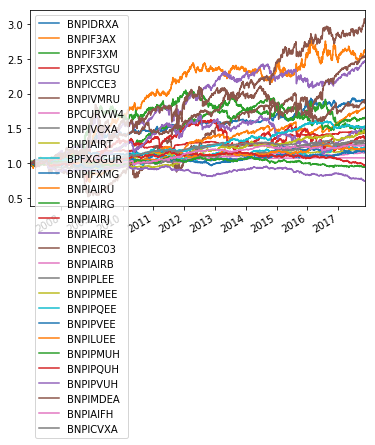

In [7]:
risk_premia_fx.plot()

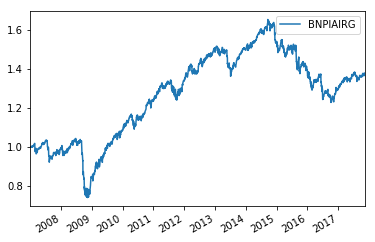

In [8]:
AIR_ER_GBP.plot()

In [9]:
np.log(1 + risk_premia_fx.pct_change()).corr(method='pearson')

,BNPIDRXA,BNPIF3AX,BNPIF3XM,BPFXSTGU,BNPICCE3,BNPIVMRU,BPCURVW4,BNPIVCXA,BNPIAIRT,BPFXGGUR,...,BNPIPMEE,BNPIPQEE,BNPIPVEE,BNPILUEE,BNPIPMUH,BNPIPQUH,BNPIPVUH,BNPIMDEA,BNPIAIFH,BNPICVXA
BNPIDRXA,1.000000,0.424088,0.307608,-0.000386,0.071005,-0.145157,0.086416,-0.013167,-0.076615,-0.093318,...,0.000168,0.001555,-0.082180,0.030302,-0.031722,-0.062680,-0.095039,0.062213,-0.020197,-0.009328
BNPIF3AX,0.424088,1.000000,0.395906,-0.001546,0.041563,-0.080985,0.034940,0.005715,0.007139,-0.008201,...,-0.016434,0.002724,-0.060266,0.019901,0.054450,-0.033962,-0.062446,0.114965,-0.045468,0.008542
BNPIF3XM,0.307608,0.395906,1.000000,-0.000769,-0.014921,-0.157603,0.070217,-0.058121,-0.031500,-0.057323,...,-0.011172,-0.005380,-0.051719,-0.027244,0.017084,-0.034398,-0.055467,0.090041,-0.015139,-0.058192
BPFXSTGU,-0.000386,-0.001546,-0.000769,1.000000,0.015890,-0.016083,-0.051222,-0.019111,0.014179,0.082885,...,0.015481,0.012467,0.015642,0.031212,0.025738,0.000565,-0.017860,-0.038505,-0.025735,-0.027789
BNPICCE3,0.071005,0.041563,-0.014921,0.015890,1.000000,0.062447,-0.011890,0.129057,0.168523,0.021286,...,0.103754,0.043428,0.044734,0.145531,0.062885,-0.020644,-0.070122,0.149605,0.220366,0.133822
BNPIVMRU,-0.145157,-0.080985,-0.157603,-0.016083,0.062447,1.000000,-0.253494,0.229692,0.140746,0.328149,...,0.058520,0.038774,0.086380,0.093628,0.046415,0.041191,0.048804,0.060379,0.302564,0.232518
BPCURVW4,0.086416,0.034940,0.070217,-0.051222,-0.011890,-0.253494,1.000000,-0.090094,-0.070805,-0.177047,...,0.017888,0.066968,-0.018458,0.041918,0.017022,0.002822,-0.011043,0.270501,-0.083805,-0.094113
BNPIVCXA,-0.013167,0.005715,-0.058121,-0.019111,0.129057,0.229692,-0.090094,1.000000,0.139351,0.144353,...,0.033067,0.006873,0.022510,0.062092,0.043815,0.026453,-0.002898,0.016957,0.290759,0.988661
BNPIAIRT,-0.076615,0.007139,-0.031500,0.014179,0.168523,0.140746,-0.070805,0.139351,1.000000,0.080301,...,0.032015,-0.005817,-0.007643,0.060158,0.018023,-0.031122,-0.002753,0.045571,0.280440,0.137254
BPFXGGUR,-0.093318,-0.008201,-0.057323,0.082885,0.021286,0.328149,-0.177047,0.144353,0.080301,1.000000,...,0.062091,0.027666,0.066698,0.030327,-0.001133,0.040408,0.035246,0.063610,0.166711,0.147870


In [10]:
risk_premia_fx.head()

,BNPIDRXA,BNPIF3AX,BNPIF3XM,BPFXSTGU,BNPICCE3,BNPIVMRU,BPCURVW4,BNPIVCXA,BNPIAIRT,BPFXGGUR,...,BNPIPMEE,BNPIPQEE,BNPIPVEE,BNPILUEE,BNPIPMUH,BNPIPQUH,BNPIPVUH,BNPIMDEA,BNPIAIFH,BNPICVXA
2007-01-03,1,1,1,1,1,1,1,NaN,1,1,...,1,1,1,1,1,1,1,1,NaN,NaN
2007-01-04,1.00021,1.00964,1.00779,1.00117,1,1.0007,1.00021,NaN,0.999992,0.998907,...,0.997805,0.99609,0.99558,0.99766,1.00124,1.00024,0.996902,1.00015,NaN,NaN
2007-01-05,1.00363,0.992349,0.998359,1.0029,0.999699,0.998684,0.999778,NaN,1.00011,0.993955,...,1.00698,1.00052,1,0.99642,0.999333,0.999586,0.998485,0.989704,NaN,NaN
2007-01-08,1.00423,0.976684,0.986562,1.00288,0.999954,0.999532,0.999615,NaN,1.00023,0.994309,...,1.01412,1.00525,1.00236,0.997761,1.00021,0.998146,0.996573,0.988449,NaN,NaN
2007-01-09,1.0022,0.967344,0.978349,1.00237,0.999763,0.999744,0.999405,NaN,1.00034,0.999933,...,1.01415,1.00505,1.0025,0.999367,1.00182,0.995801,0.994901,0.98894,NaN,NaN
